# Wizualizacja wyników analizy

W tym notatniku następuje zwizualizowanie wyników modelowania tematycznego.

Poniżej przedstawione są wynikłe z analizy modele.

In [1]:
import pandas as pd
import gensim

##### Wybrany model LDA, 2 wątki

In [2]:
lda_model_loaded = gensim.models.LdaMulticore.load('model\\lda_all_1')

for idx, topic in lda_model_loaded.print_topics(-1,12):
    print('Topic: {} \nWords: {}\n'.format(idx, topic))

Topic: 0 
Words: 0.136*"meal" + 0.119*"benefit" + 0.100*"vitamin" + 0.091*"family" + 0.086*"juice" + 0.082*"fresh" + 0.074*"child" + 0.072*"tasty" + 0.064*"positive" + 0.059*"value" + 0.058*"diet" + 0.057*"interest"

Topic: 1 
Words: 0.150*"field" + 0.143*"grow" + 0.142*"farmer" + 0.130*"process" + 0.099*"crop" + 0.085*"polish" + 0.081*"natural" + 0.078*"nature" + 0.065*"cultivation" + 0.019*"value" + 0.004*"vitamin" + 0.000*"fresh"



##### Wybrany model LDA, symulowana liczba wątków

In [3]:
lda_model_loaded_2 = gensim.models.LdaMulticore.load('model\\lda_all_2')

for idx, topic in lda_model_loaded_2.print_topics(-1,8):
    print('Topic: {} \nWords: {}\n'.format(idx, topic))

Topic: 0 
Words: 0.291*"family" + 0.271*"vitamin" + 0.237*"child" + 0.139*"positive" + 0.056*"fresh" + 0.000*"juice" + 0.000*"diet" + 0.000*"field"

Topic: 1 
Words: 0.470*"meal" + 0.249*"tasty" + 0.223*"fresh" + 0.052*"diet" + 0.000*"juice" + 0.000*"vitamin" + 0.000*"process" + 0.000*"interest"

Topic: 2 
Words: 0.431*"benefit" + 0.280*"value" + 0.208*"interest" + 0.075*"positive" + 0.000*"diet" + 0.000*"cultivation" + 0.000*"grow" + 0.000*"vitamin"

Topic: 3 
Words: 0.177*"juice" + 0.175*"process" + 0.157*"natural" + 0.154*"grow" + 0.115*"nature" + 0.090*"diet" + 0.088*"cultivation" + 0.041*"vitamin"

Topic: 4 
Words: 0.242*"field" + 0.230*"farmer" + 0.160*"crop" + 0.137*"polish" + 0.102*"grow" + 0.064*"process" + 0.032*"cultivation" + 0.030*"nature"



### Wizualizacja wyniku algorytmu LDA

W celu wizualizacji poszczególnych tematów, zostasowano skalowanie piktogramów. Piktogramy zostały specjalnie dopasowane do słów w poszczególnych tematach. Wielkość piktogramów jest skalowana na podstawie prawdopodobieństwa wystąpienia słowa mu odpowiadającego w danym temacie.

Poniższy algorytm w pierwszej kolejności tworzy listy słów występujących w poszczególnych tematach. Następnie przygotowana jest tabela z wartościami prawdopodobieństw, które będą stanowić mnożniki skalujące piktogramy. Kolejnym krokiem jest stworzenie ramki danych zawierającej odpowiednie piktogramy i odpowiadające im słowa. Następnie ścieżki do plików z piktogramami są konwertowane do języka **HTML** w celu ich wizualizacji. W tym samym kroku nadawane są im odpowiednie wielkości. Ostatnim krokiem jest stylizacja całej tabeli i wyświetlenie wyniku. Oba algorytmy działają na tej samej zasadzie, różnią je jedynie użyte parametry.

##### Dwa wątki

In [4]:
import pandas as pd
from IPython.core.display import HTML

df = pd.DataFrame()
df_t = pd.DataFrame()
vector = pd.DataFrame()

#stworzenie kolumn ze słowami
df_t[1] = ["meal","benefit","vitamin","family","juice","fresh","child","tasty","positive","value","diet","interest"]
df_t[2] = ["field","grow","farmer","process","crop","polish","natural","nature","cultivation","value","vitamin","fresh"]

#przygotowanie tabeli z mnożnikami
for i in range(2):
    topics = lda_model_loaded.get_topic_terms(i,12)
    multiplier = pd.DataFrame(topics, columns=['num','pr_'+str(i+1)+''])
    vector = pd.concat([vector, multiplier['pr_'+str(i+1)+'']], axis=1, sort=False)

vector = vector*1000

#wczytywanie obrazów do ramki danych
def img_load(df, idx):
    img = []
    for i in range(vector['pr_1'].size):
        img.append('http://localhost:8888/files/Projekt%20dla%20metodolog.pl/IKONKI/arb/'+str(idx)+'/'+str(i+1)+'.png')
    df['Temat_'+str(idx)+'_słowa'] = df_t[idx]
    df['Temat_'+str(idx)+''] = img

for i in range(2):
    img_load(df, i+1)

#konwertowanie ramki danych do html
def path_to_image_html(path, idx):
    return '<img src="'+ path + '" width="'+ vector['pr_'+str(idx)+''].astype(str)+'" >'

for i in range(2):
    df['Temat_'+str(i+1)+''] = path_to_image_html(df['Temat_'+str(i+1)+''], i+1)


pd.set_option('display.max_colwidth', None)
print("Model dla 2 wątków")
#HTML(df.T.to_html(escape=False))
dfStyler = df.T.style.set_properties(**{'text-align': 'left'})
dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

Model dla 2 wątków


,0,1,2,3,4,5,6,7,8,9,10,11
Temat_1_słowa,meal,benefit,vitamin,family,juice,fresh,child,tasty,positive,value,diet,interest
Temat_1,,,,,,,,,,,,
Temat_2_słowa,field,grow,farmer,process,crop,polish,natural,nature,cultivation,value,vitamin,fresh
Temat_2,,,,,,,,,,,,


##### Pięć wątków - wynik symulacji

In [5]:
import pandas as pd
from IPython.core.display import HTML

df = pd.DataFrame()
df_t = pd.DataFrame()
vector = pd.DataFrame()

#stworzenie kolumn ze słowami
df_t[1] = ["family","vitamin","child","positive","fresh","juice","diet","field"]
df_t[2] = ["meal","tasty","fresh","diet","juice","vitamin","process","interest"]
df_t[3] = ["benefit","value","interest","positive","diet","cultivation","grow","vitamin"]
df_t[4] = ["juice","process","natural","grow","nature","diet","cultivation","vitamin"]
df_t[5] = ["field","farmer","crop","polish","grow","process","cultivation","nature"]

#przygotowanie tabeli z mnożnikami
for i in range(5):
    topics = lda_model_loaded_2.get_topic_terms(i,8)
    multiplier = pd.DataFrame(topics, columns=['num','pr_'+str(i+1)+''])
    vector = pd.concat([vector, multiplier['pr_'+str(i+1)+'']], axis=1, sort=False)

vector = vector*350

#wczytywanie obrazów
def img_load(df, idx):
    img = []
    for i in range(vector['pr_1'].size):
        img.append('http://localhost:8888/files/Projekt%20dla%20metodolog.pl/IKONKI/sym/'+str(idx)+'/'+str(i+1)+'.png')
    df['Temat_'+str(idx)+'_słowa'] = df_t[idx]
    df['Temat_'+str(idx)+''] = img

for i in range(5):
    img_load(df, i+1)

#konwertowanie obrazów do html 
def path_to_image_html(path, idx):
    return '<img src="'+ path + '" width="'+ vector['pr_'+str(idx)+''].astype(str)+'" >'

for i in range(5):
    df['Temat_'+str(i+1)+''] = path_to_image_html(df['Temat_'+str(i+1)+''], i+1)


pd.set_option('display.max_colwidth', None)
print("Model dla 5 wątków")
#HTML(df.to_html(escape=False))
dfStyler = df.T.style.set_properties(**{'text-align': 'left'})
dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

Model dla 5 wątków


,0,1,2,3,4,5,6,7
Temat_1_słowa,family,vitamin,child,positive,fresh,juice,diet,field
Temat_1,,,,,,,,
Temat_2_słowa,meal,tasty,fresh,diet,juice,vitamin,process,interest
Temat_2,,,,,,,,
Temat_3_słowa,benefit,value,interest,positive,diet,cultivation,grow,vitamin
Temat_3,,,,,,,,
Temat_4_słowa,juice,process,natural,grow,nature,diet,cultivation,vitamin
Temat_4,,,,,,,,
Temat_5_słowa,field,farmer,crop,polish,grow,process,cultivation,nature
Temat_5,,,,,,,,


#### Chmury słów

##### Dwa wątki

In [6]:
topic_1 = pd.Series(data={'Meal':0.135507, 'Benefit':0.118648, 'Vitamin':0.100491, 'Family':0.090842, 'Juice':0.085576, 
                          'Fresh':0.081622, 'Child':0.074075, 'Tasty':0.071664, 'Positive':0.064008, 'Value':0.059366, 
                          'Diet':0.058202, 'Interest':0.057317, 'Natural':0.000309, 'Process':0.000309, 'Field':0.000305 , 
                          'Farmer':0.000300, 'Nature':0.000299, 'Cultivation':0.000294, 'Crop':0.000292, 'Grow':0.000291, 
                          'Polish':0.000286})
topic_2 = pd.Series(data={'Field':0.149555, 'Grow':0.142897, 'Farmer':0.142375, 'Process':0.130046, 'Crop':0.098753, 
                          'Polish':0.084900, 'Natural':0.081283, 'Nature':0.077701, 'Cultivation':0.065387, 'Value':0.019142, 
                          'Vitamin':0.004413, 'Fresh':0.000471, 'Benefit':0.000392, 'Diet':0.000369, 'Family':0.000362, 
                          'Juice':0.000347, 'Tasty':0.000343, 'Child':0.000330, 'Meal':0.000325, 'Positive':0.000319, 
                          'Interest':0.000289})

(-0.5, 799.5, 399.5, -0.5)

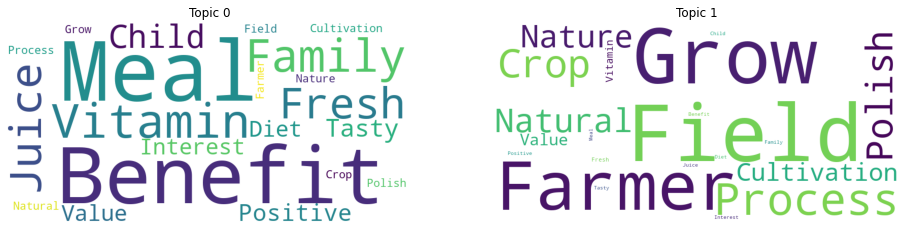

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

wc = WordCloud(width=800, height=400, background_color='white', 
               max_words=1000, contour_width=3, contour_color='steelblue', collocations=False)

fig = plt.figure(figsize=(16,12))
plt.subplot(221)
wc.generate_from_frequencies(frequencies=topic_1)
a = wc.to_image()
plt.title('Topic 0')
plt.imshow(a)
plt.axis('Off')
plt.subplot(222)
wc.generate_from_frequencies(frequencies=topic_2)
b = wc.to_image()
plt.title('Topic 1')
plt.imshow(b)
plt.axis('Off')

##### Pięć wątków

In [8]:

topic_1 = pd.Series(data={'Family':0.291286, 'Vitamin':0.270790, 'Child':0.237402, 'Positive':0.139302, 'Fresh':0.056238, 'Juice':0.000313, 'Diet':0.000313, 
                          'Field':0.000312, 'Natural':0.000312, 'Grow':0.000312, 'Process':0.000312, 'Farmer':0.000311, 'Value':0.000311, 'Meal':0.000311, 'Crop':0.000311, 
                          'Nature':0.000311, 'Polish':0.000311, 'Benefit':0.000311, 'Interest':0.000310, 'Cultivation':0.000310, 'Tasty':0.000310, 
})
topic_2 = pd.Series(data={'Meal':0.470285, 'Tasty':0.248638, 'Fresh':0.223089, 'Diet':0.052259, 'Juice':0.000340, 'Vitamin':0.000339, 
                          'Process':0.000338, 'Interest':0.000337, 'Grow':0.000337, 'Farmer':0.000337, 'Family':0.000337, 'Cultivation':0.000337, 'Polish':0.000337, 
                          'Natural':0.000337, 'Positive':0.000337, 'Nature':0.000337, 'Value':0.000336, 'Field':0.000336, 'Crop':0.000336, 'Benefit':0.000336, 'Child':0.000335, 
})
topic_3 = pd.Series(data={'Benefit':0.431454, 'Value':0.279600, 'Interest':0.208043, 'Positive':0.074906, 'Diet':0.000356, 'Cultivation':0.000355, 
                          'Grow':0.000355, 'Vitamin':0.000354, 'Process':0.000354, 'Nature':0.000353, 'Crop':0.000353, 'Juice':0.000353, 'Meal':0.000353, 'Fresh':0.000352, 
                          'Field':0.000352, 'Family':0.000352, 'Natural':0.000352, 'Tasty':0.000351, 'Farmer':0.000351, 'Child':0.000351, 'polish':0.000351, 
})
topic_4 = pd.Series(data={'Juice':0.177167, 'Process':0.175235, 'Natural':0.157284, 'Grow':0.154339, 'Nature':0.114782, 'Diet':0.089515, 'Cultivation':0.087797, 
                          'Vitamin':0.041271, 'Fresh':0.000202, 'Crop':0.000201, 'Value':0.000201, 'Field':0.000201, 'Polish':0.000201, 'Benefit':0.000201, 
                          'Positive':0.000201, 'Farmer':0.000201, 'Family':0.000200, 'Tasty':0.000200, 'Child':0.000200, 'Meal':0.000200, 'Interest':0.000200, 
})
topic_5 = pd.Series(data={'Field':0.241905, 'Farmer':0.230276, 'Crop':0.159662, 'Polish':0.137233, 'Grow':0.102316, 'Process':0.064088, 
                          'Cultivation':0.032473, 'Nature':0.029865, 'Vitamin':0.000169, 'Fresh':0.000169, 'Diet':0.000168, 'Natural':0.000168, 'Value':0.000168, 'Juice':0.000168, 
                          'Meal':0.000168, 'Family':0.000168, 'Positive':0.000168, 'Benefit':0.000167, 'Child':0.000167, 'Tasty':0.000167, 'Interest':0.000167, 
})

(-0.5, 799.5, 399.5, -0.5)

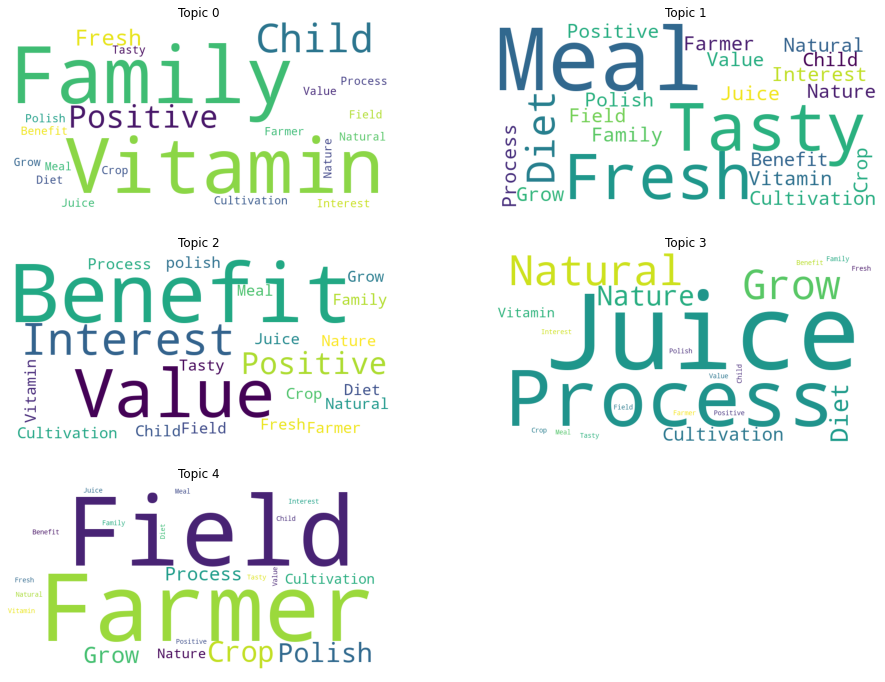

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

wc = WordCloud(width=800, height=400, background_color='white', 
               max_words=1000, contour_width=3, contour_color='steelblue', collocations=False)

fig = plt.figure(figsize=(16,12))
plt.subplot(321)
wc.generate_from_frequencies(frequencies=topic_1)
a = wc.to_image()
plt.title('Topic 0')
plt.imshow(a)
plt.axis('Off')
plt.subplot(322)
wc.generate_from_frequencies(frequencies=topic_2)
b = wc.to_image()
plt.title('Topic 1')
plt.imshow(b)
plt.axis('Off')
plt.subplot(323)
wc.generate_from_frequencies(frequencies=topic_3)
c = wc.to_image()
plt.title('Topic 2')
plt.imshow(c)
plt.axis('Off')
plt.subplot(324)
wc.generate_from_frequencies(frequencies=topic_4)
d = wc.to_image()
plt.title('Topic 3')
plt.imshow(d)
plt.axis('Off')
plt.subplot(325)
wc.generate_from_frequencies(frequencies=topic_5)
e = wc.to_image()
plt.title('Topic 4')
plt.imshow(e)
plt.axis('Off')